In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

In [2]:
# fixing random state for reproducibility
np.random.seed(194987332)

In [3]:
dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

In [4]:
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

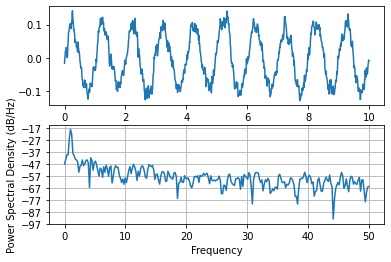

In [5]:
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(t, s)
ax1.psd(s, 512, 1/dt)

plt.show()

Equivalent MatLab code will be:

```
dt = 0.01;
t = [0:dt:10];
nse = randn(size(t));
r = exp(-t/0.05);
cnse = conv(nse, r)*dt;
cnse = cnse(1:length(t));
s = 0.1*sin(2*pi*t) + cnse;

subplot(211)
plot(t, s)
subplot(212)
psd(s, 512, 1/dt)
```

In [6]:
dt = np.pi / 100
fs = 1.0 / dt
t = np.arange(0, 8, dt)

y = 10 * np.sin(2 * np.pi * 4 * t) + 5 * np.sin(2 * np.pi * 4.25 * t)
y = y + np.random.randn(*t.shape)

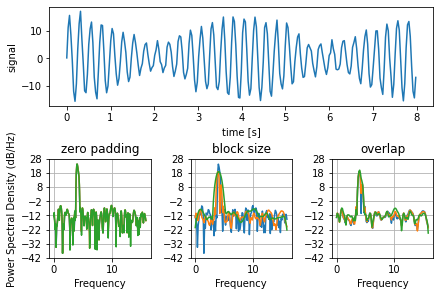

In [7]:
# plot the raw time series
fig = plt.figure(constrained_layout=True)

gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(t, y)
ax.set_xlabel("time [s]")
ax.set_ylabel("signal")

# plot the PSD with different amounts of zero padding.
# this uses the entire time series at once
ax2 = fig.add_subplot(gs[1, 0])
ax2.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)
ax2.set_title("zero padding")

# plot the PSD with different block sizes,
# zero pad to the length of the original data sequence
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
ax3.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
ax3.set_ylabel("")
ax3.set_title("block size")

# plot the PSD with different amounts of overlap between blocks
ax4 = fig.add_subplot(gs[1, 2], sharex=ax2, sharey=ax2)

ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
ax4.psd(
    y, NFFT=len(t) // 2, pad_to=len(t),
    noverlap=int(0.05 * len(t) / 2.0), Fs=fs,
)

ax4.psd(
    y, NFFT=len(t) // 2, pad_to=len(t),
    noverlap=int(0.2 * len(t) / 2.0), Fs=fs,
)

ax4.set_ylabel("")
ax4.set_title("overlap")

plt.show()

In [8]:
fs = 1000
t = np.linspace(0, 0.3, 301)
a = np.array([2, 8]).reshape(-1, 1)
f = np.array([150, 140]).reshape(-1, 1)
xn = (a * np.sin(2 * np.pi * f * t)).sum(axis=0)
xn += 5 * np.random.randn(*t.shape)

In [9]:
yticks = np.arange(-50, 30, 10)
yrange = (yticks[0], yticks[-1])
xticks = np.arange(0, 550, 100)

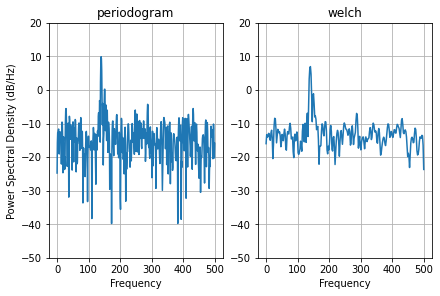

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)

ax0.psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024, scale_by_freq=True)
ax0.set_title("periodogram")
ax0.set_xticks(xticks)
ax0.set_yticks(yticks)
ax0.grid(True)
ax0.set_ylim(yrange)

ax1.psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, pad_to=512, noverlap=75, scale_by_freq=True)
ax1.set_title("welch")
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_ylabel("") # overwrite the y-label added by `psd`
ax1.grid(True)
ax1.set_ylim(yrange)

plt.show()